<a href="https://colab.research.google.com/github/aymanbahaa/MPI4Pyhton/blob/main/Howto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MPI on windows with Python
##Preparing Windows

Microsoft MPI (MS-MPI) is a Microsoft implementation of the Message Passing Interface standard for developing and running parallel applications on the Windows platform
1.   You need to download and install the microsoft MPI from https://docs.microsoft.com/en-us/message-passing-interface/microsoft-mpi
2.   Follwo teh Download link, you should see a screen like this
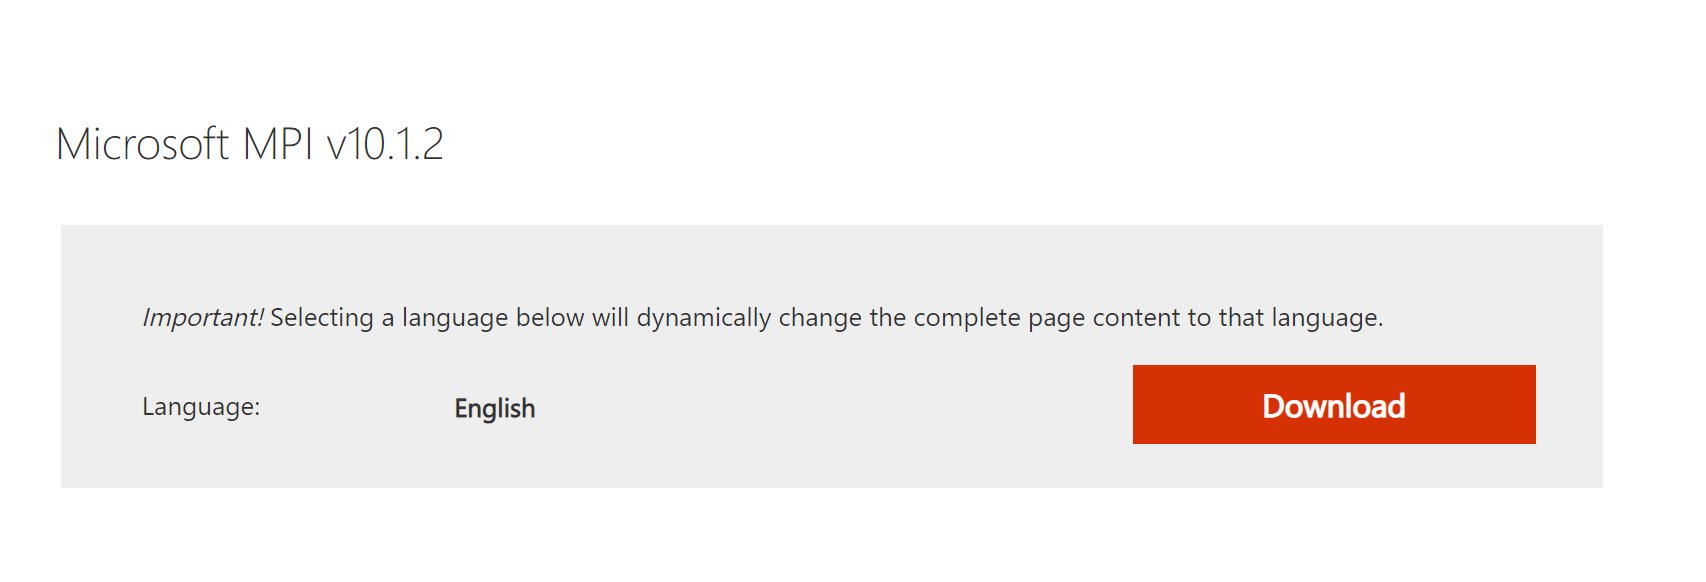
3. Download both the setup and and sdk fiels and install them by following the on-screen instructions
4. You need to add the path of your installed MPI middleware to the system environement variable (usually C:\Program Files\Microsoft MPI\)






##Installing the Python MPI library
You need to install teh mpi4py library to be able to write MPI code

In [2]:
pip install mpi4py

     |████████████████████████████████| 2.5 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.3-cp37-cp37m-linux_x86_64.whl size=2185253 sha256=0eb062cd527ad1f46f408e68122352e18ec70ffc796cc8e9e98e07c1be8bf5ef
  Stored in directory: /root/.cache/pip/wheels/7a/07/14/6a0c63fa2c6e473c6edc40985b7d89f05c61ff25ee7f0ad9ac
Successfully built mpi4py


It is a good idea to check if you have numpy, 
Just pip install it

In [3]:
pip install numpy


Now you are ready to test your first **script**


In [4]:
from mpi4py import MPI
comm = MPI.COMM_WORLD
my_rank = comm.Get_rank()
p = comm.Get_size()
if my_rank != 0:
 message = "Hello from "+str(my_rank)
 comm.send(message, dest=0)
else :
 for procid in range(1,p):
  message = comm.recv(source=procid)
  print ("process 0 receives message from process",procid,":",message)

To run this script you need to 
1. Save the script intpo a .py file (here we have chosen p2p.py)
2. call the MPI middleware, Here you pass to the middleware the number of processes 


In [ ]:
mpiexec -np 4 python p2p.py

The output will look like this:<bR>
process 0 receives message from process 1 : Hello from 1<br>
process 0 receives message from process 2 : Hello from 2<br>
process 0 receives message from process 3 : Hello from 3